In [1]:
library(glmnet)
library(RColorBrewer)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
set.seed(2018)
work_mul<-window(Seatbelts, end = 1982+11/12)
X <- work_mul[,-1]
y <- work_mul[,1]
y <- as.vector(y)

In [3]:
fun <- function(alp){
  model <- cv.glmnet(as.matrix(X),y,alpha = alp)
  fit <-  predict(model,s = model$lambda.min,newx=as.matrix(X))
  return(mean((fit-y)^2))
}

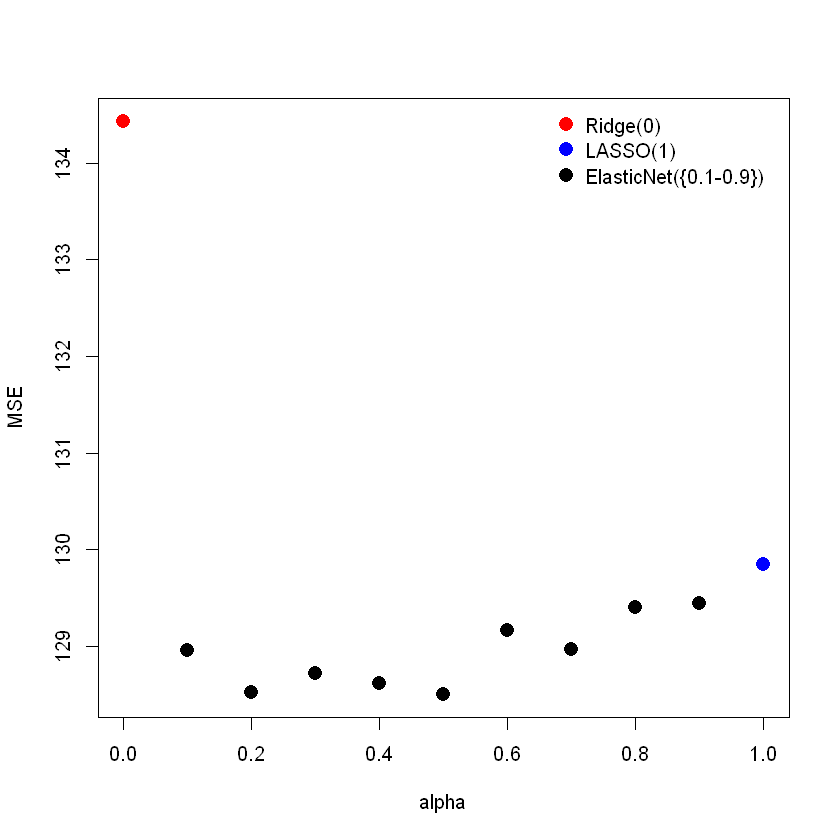

In [4]:
mse=sapply(0:10*.1, fun)
cols=c(2,rep(3,8),4)
plot(1,type = 'n',xlab = 'alpha',ylab = 'MSE', xlim = c(0,1),ylim = c(min(mse),max(mse)))
points(1:9*.1,mse[2:10],cex=1.5,pch=16)
points(0,mse[1],cex=1.5,pch=16,col='red')
points(1,mse[11],cex=1.5,pch=16,col='blue')
legend('topright',c('Ridge(0)','LASSO(1)','ElasticNet({0.1-0.9})'),pch=16,col = c('red','blue','black'),bty = 'n',pt.cex = 1.5)

In [5]:
model <- cv.glmnet(as.matrix(X),y,alpha = 0.5,keep=T, lambda = 10^seq(5,-3,-0.1))
best_lambda<-model$lambda.min
best_lambda

[1] 0.3162278

In [6]:
EN_coeff <- predict(model,s = best_lambda,type = "coefficients")

In [7]:
EN_coeff

8 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -2.249109e+01
drivers      7.861629e-02
front        2.849765e-03
rear         3.298455e-03
kms          6.082063e-04
PetrolPrice -4.354019e+00
VanKilled    1.130429e-01
law          .           

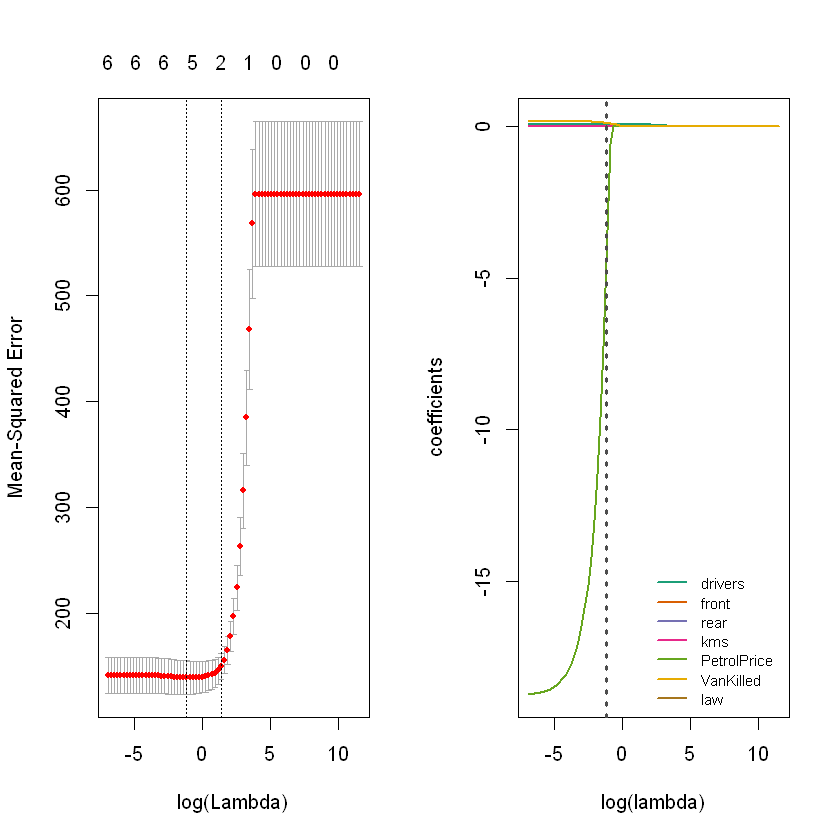

In [6]:
op=par(mfrow=c(1,2))
plot(model)
hatbeta <- as.matrix(model$glmnet.fit$beta)
lambda = log(10^seq(5,-3,-0.1))
plot(1,type = 'n',xlim = c(min(lambda),max(lambda)),
     ylim = c(min(hatbeta),max(hatbeta)),
     xlab = 'log(lambda)',ylab = 'coefficients')

colrs = c(brewer.pal(8,"Dark2"),brewer.pal(5,"Accent"))
for (i in 1:6) {
  lines(lambda,hatbeta[i,],col=colrs[i],lwd=2)
}
abline(v=log(best_lambda),lty=3,lwd=3,col='gray30')
legend('bottomright',rownames(hatbeta),lty = 1,lwd=2,
       col=colrs,bty = 'n',cex = 0.75)
par(op)

In [7]:
pre=predict(model,X)

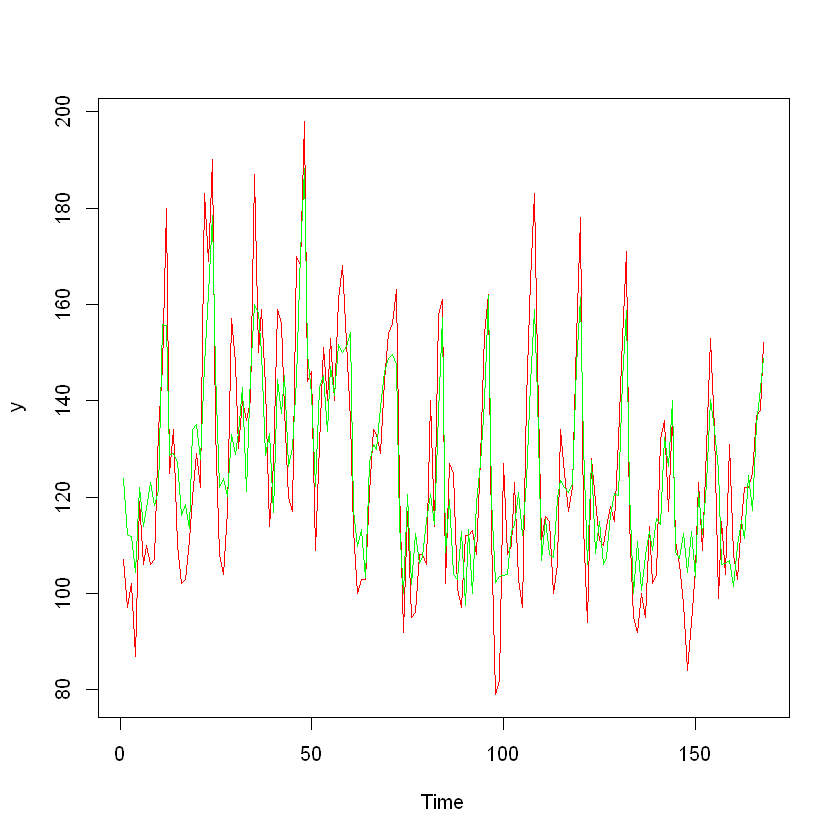

In [8]:
ts.plot(y,col="red")
lines(ts(pre),col="green")

In [9]:
rmse=(sum(((pre - y)**2))/length(y))^(1/2)
rmse

[1] 11.98031